# Project Goals

## Double Variable Association
Accounting for Year
- Trendline in Life Expectancy
- Trendline in GDP

Accounting for Country
- Correlation with Life Expectancy
- Correlation with GDP

## Triple Variable Association
Accounting for Year
- Correlation of Life Expectancy and GDP

Accounting for Country
- Correlation of Life Expectancy and GDP

# Load the Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np

%matplotlib notebook

In [2]:
df = pd.read_csv('all_data.csv')

In [3]:
df[df.Country == 'USA'].head()

,Country,Year,Life expectancy at birth (years),GDP


# Explore and Explain Data


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [5]:
for col in df.columns:
    print(df[col].describe(), '\n')

count        96
unique        6
top       Chile
freq         16
Name: Country, dtype: object 

count      96.000000
mean     2007.500000
std         4.633971
min      2000.000000
25%      2003.750000
50%      2007.500000
75%      2011.250000
max      2015.000000
Name: Year, dtype: float64 

count    96.000000
mean     72.789583
std      10.672882
min      44.300000
25%      74.475000
50%      76.750000
75%      78.900000
max      81.000000
Name: Life expectancy at birth (years), dtype: float64 

count    9.600000e+01
mean     3.880499e+12
std      5.197561e+12
min      4.415703e+09
25%      1.733018e+11
50%      1.280220e+12
75%      4.067510e+12
max      1.810000e+13
Name: GDP, dtype: float64 



In [6]:
df.loc[df.Country == 'United States of America', 'Country'] = 'USA'
df.Country.unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'USA', 'Zimbabwe'],
      dtype=object)

### Basic Findings
**Country**
- Unique:
    - Chile
    - China
    - Germany
    - Mexico
    - USA
    - Zimbabwe

**Year**
- Mean:&ensp; 2000
- Max:&emsp;&nbsp;2015

**Life Expectancy**
- Range:&emsp;44.3 - 81.0
- Mean:&emsp; 72.79
- Median:&ensp;76.7

**GDP**
- Range:&emsp;4.4E9 - 1.8E13
- Mean:&emsp;&nbsp;3.88E
- Median:&ensp;1.28E12

## Single Variable Visualisation

In [7]:
def get_basic_dist(outliers=True):
    data_cols = [df['Life expectancy at birth (years)'], df['GDP']]
    data_quantiles = [np.quantile(x, [0.25, 0.75]) for x in data_cols]
    data_within_quantiles = [data_cols[x][(data_cols[x] >= data_quantiles[x][0]) & (data_cols[x] <= data_quantiles[x][1])] for x in range(2)]
    dfs_to_plot = data_cols if outliers == True else data_within_quantiles
    if outliers == True:
        fig, axes = plt.subplots(2, 2)
        for index, col in enumerate(dfs_to_plot):
            sns.histplot(ax=axes[index, 0], data=col)
            sns.boxplot(ax=axes[index,1], data=col, color='pink')
    else:
        fig, axes = plt.subplots(1, 2)
        sns.histplot(ax=axes[0], data=dfs_to_plot[0], bins=10)
        sns.histplot(ax=axes[1], data=dfs_to_plot[1], bins=10, color='pink')
    plt.subplots_adjust(hspace=0.3, wspace=0.3)
    plt.show()

<IPython.core.display.Javascript object>


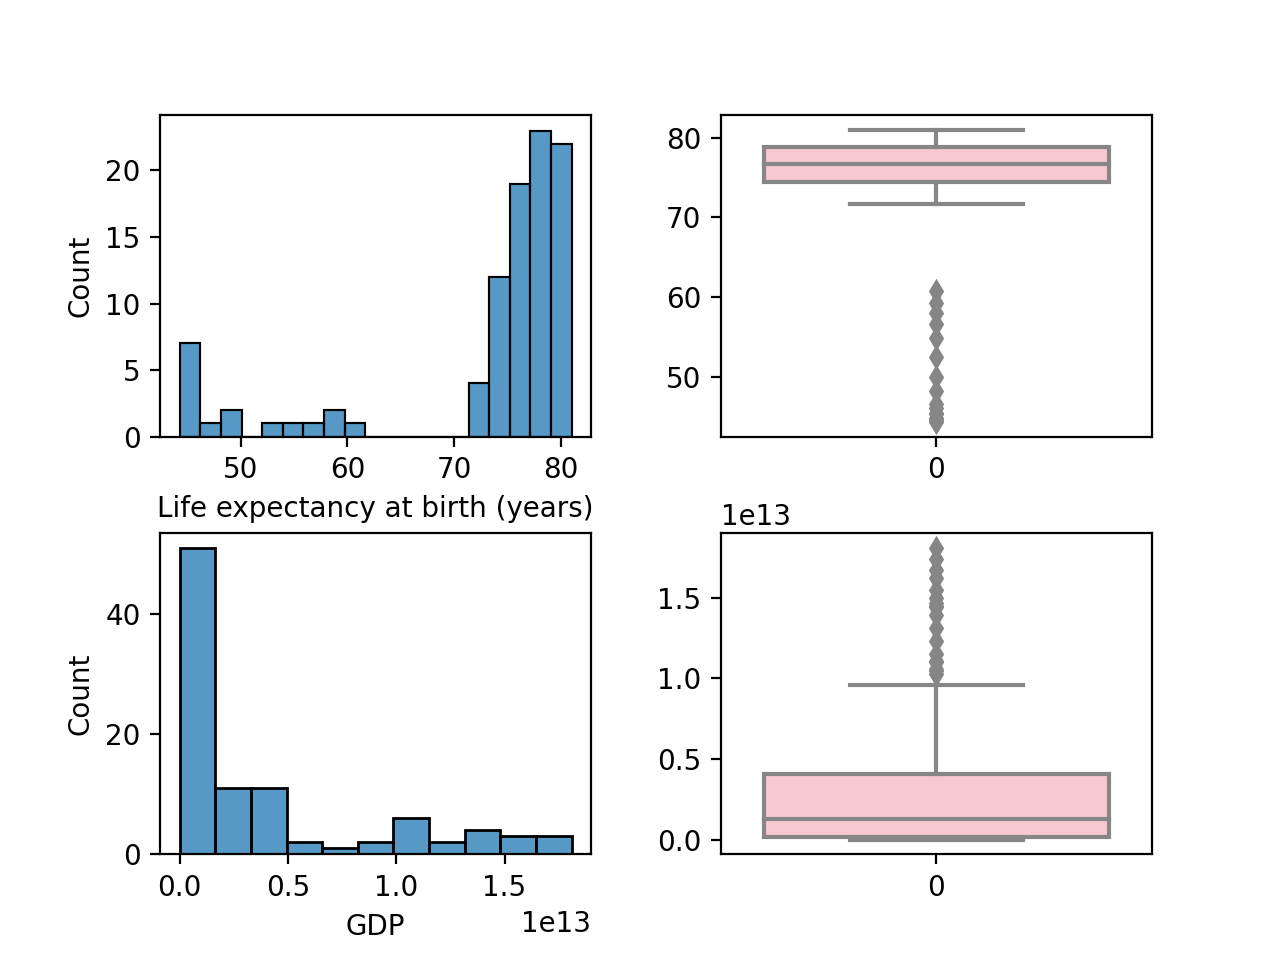

In [8]:
# With Outliers
get_basic_dist()

<IPython.core.display.Javascript object>


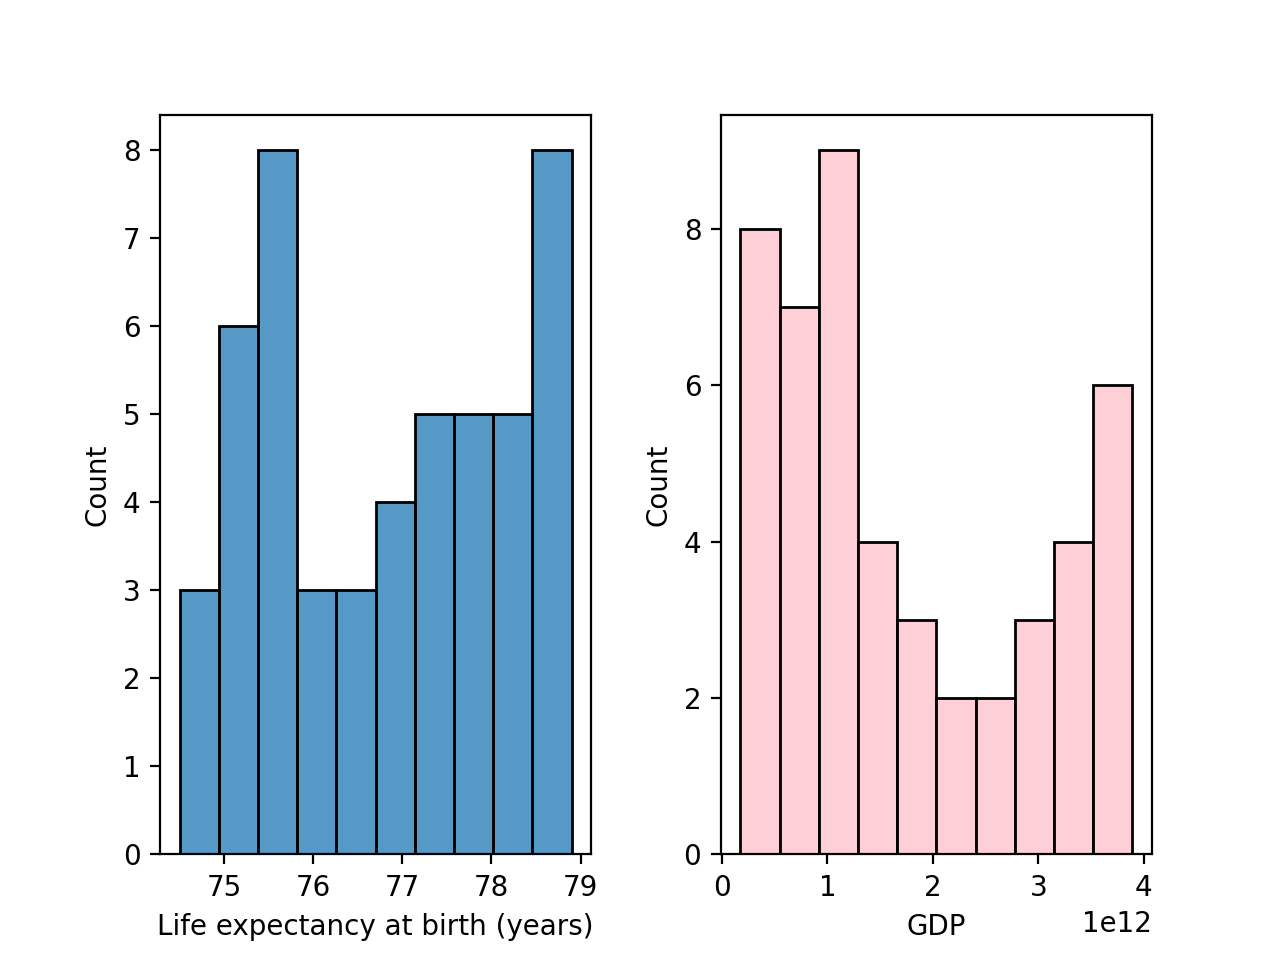

In [9]:
# Without Outliers
get_basic_dist(outliers=False)

### Single Variable Findings


## Double Variable Visualisation

In [10]:
def double_variable_vis(accounting_for):
    fig, axes = plt.subplots(1, 2, figsize=(10,5))
    sns.boxplot(ax=axes[0], data=df, y='GDP', x=accounting_for, palette='pastel')
    axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
    sns.boxplot(ax=axes[1], data=df, y='Life expectancy at birth (years)', x=accounting_for, palette='pastel')
    axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
    plt.tight_layout()
    plt.show()

In [11]:
df.groupby(['Country'])[['GDP', 'Life expectancy at birth (years)']].describe()

GDP                                                          \
         count          mean           std           min           25%   
Country                                                                  
Chile     16.0  1.697888e+11  7.687884e+10  6.973681e+10  9.387303e+10   
China     16.0  4.957714e+12  3.501096e+12  1.211350e+12  1.881585e+12   
Germany   16.0  3.094776e+12  6.674862e+11  1.949950e+12  2.740870e+12   
Mexico    16.0  9.766506e+11  2.095716e+11  6.836480e+11  7.630910e+11   
USA       16.0  1.407500e+13  2.432694e+12  1.030000e+13  1.210000e+13   
Zimbabwe  16.0  9.062580e+09  4.298310e+09  4.415703e+09  5.748309e+09   

                                                    \
                   50%           75%           max   
Country                                              
Chile     1.729975e+11  2.449515e+11  2.783840e+11   
China     4.075195e+12  7.819550e+12  1.106470e+13   
Germany   3.396350e+12  3.596078e+12  3.890610e+12   
Mexico    1.004376e+12  1.156992e+12  1.298460e+12   
USA       1.445000e+13  1.567500e+13  1.810000e+13   
Zimbabwe  6.733671e+09  1.263446e+10  1.630467e+10   

         Life expectancy at birth (years)                                    \
                                    count      mean       std   min     25%   
Country                                                                       
Chile                                16.0  78.94375  1.058911  77.3  77.975   
China                                16.0  74.26250  1.318016  71.7  73.400   
Germany                              16.0  79.65625  0.975000  78.0  78.950   
Mexico                               16.0  75.71875  0.620987  74.8  75.225   
USA                                  16.0  78.06250  0.832566  76.8  77.425   
Zimbabwe                             16.0  50.09375  5.940311  44.3  45.175   

                               
            50%     75%   max  
Country                        
Chile     79.00  79.825  80.5  
China     74.45  75.250  76.1  
Germany   79.85  80.525  81.0  
Mexico    75.65  76.150  76.7  
USA       78.15  78.725  79.3  
Zimbabwe  47.40  55.325  60.7

<IPython.core.display.Javascript object>


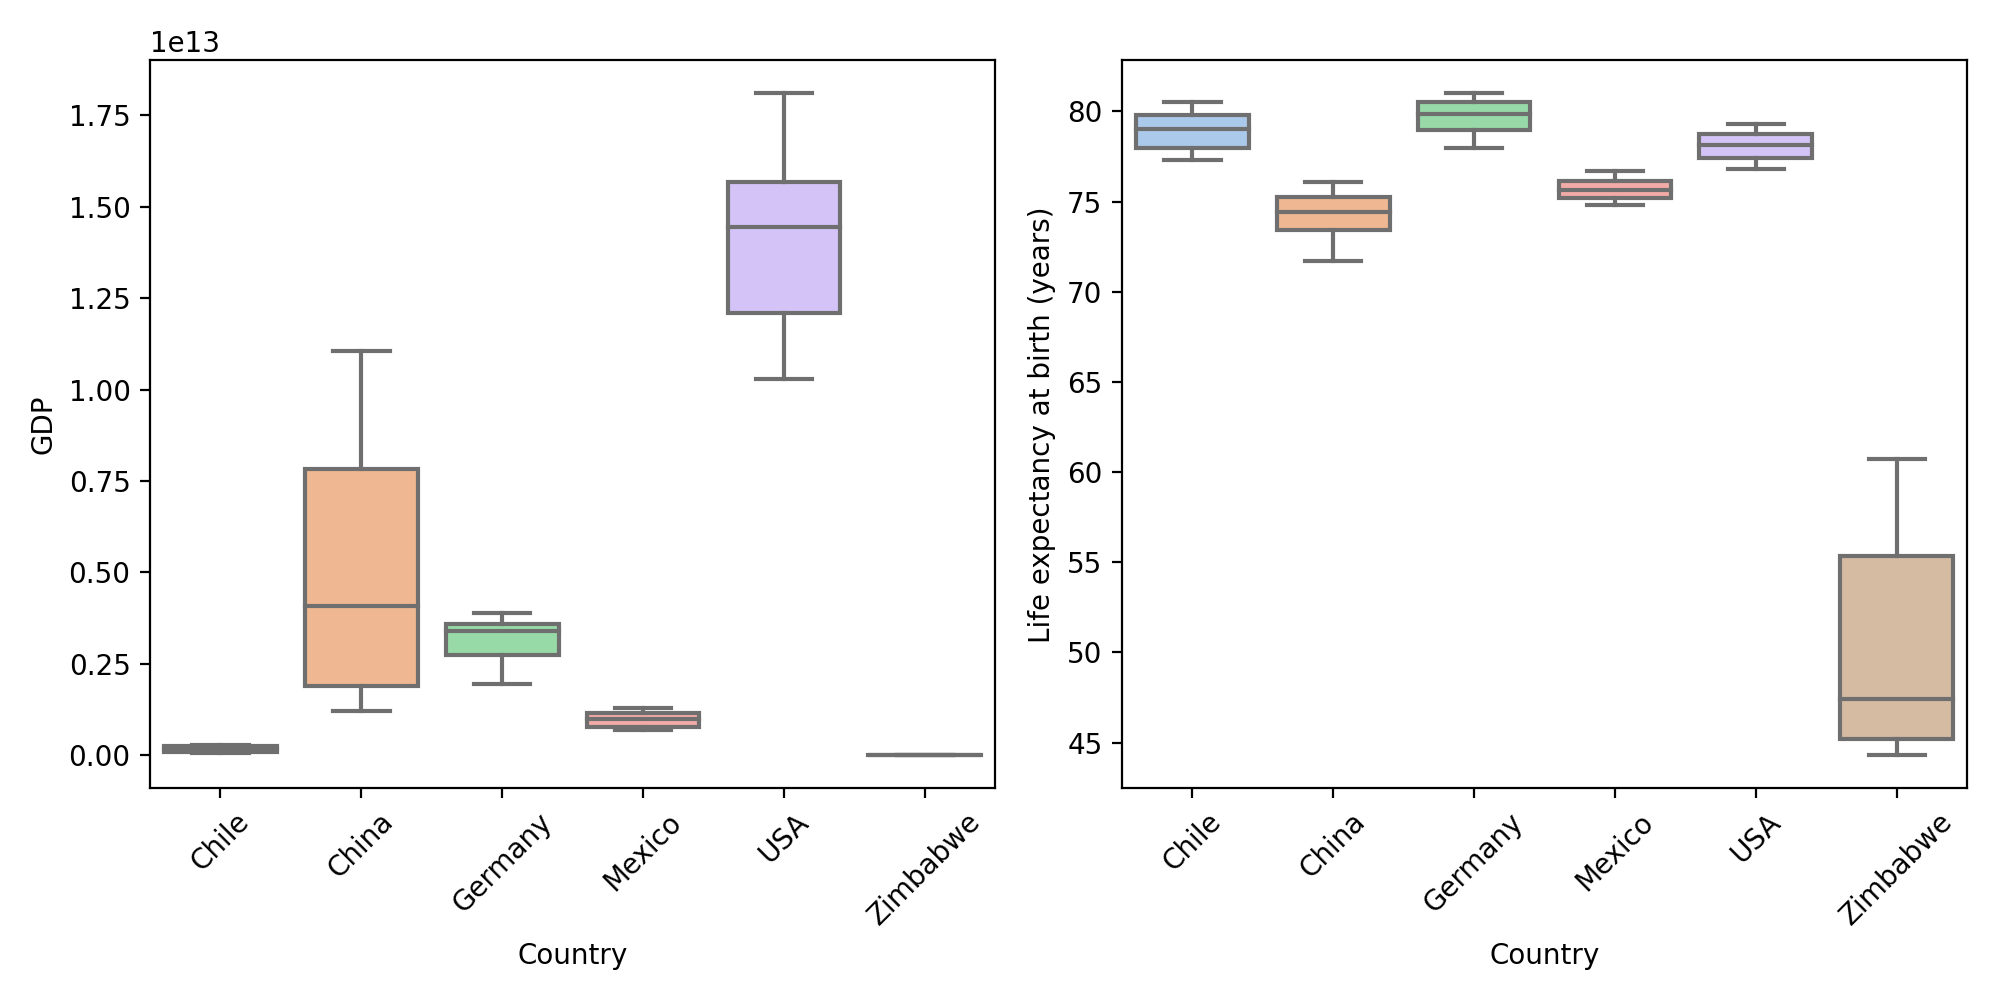

In [12]:
double_variable_vis('Country')

In [13]:
df.groupby(['Year'])[['GDP', 'Life expectancy at birth (years)']].describe()

GDP                                                          \
     count          mean           std           min           25%   
Year                                                                 
2000   6.0  2.371583e+12  3.951878e+12  6.689958e+09  2.293077e+11   
2001   6.0  2.448752e+12  4.062290e+12  6.777385e+09  2.344109e+11   
2002   6.0  2.561221e+12  4.211437e+12  6.342116e+09  2.376926e+11   
2003   6.0  2.743446e+12  4.396380e+12  5.727592e+09  2.350536e+11   
2004   6.0  2.991647e+12  4.689670e+12  5.805598e+09  2.669748e+11   
2005   6.0  3.207074e+12  4.981507e+12  5.755215e+09  3.088102e+11   
2006   6.0  3.463349e+12  5.268510e+12  5.443896e+09  3.574112e+11   
2007   6.0  3.785750e+12  5.474100e+12  5.291950e+09  3.910720e+11   
2008   6.0  4.055986e+12  5.547122e+12  4.415703e+09  4.100485e+11   
2009   6.0  4.000653e+12  5.476381e+12  8.621574e+09  3.530290e+11   
2010   6.0  4.299587e+12  5.729365e+12  1.014186e+10  4.266860e+11   
2011   6.0  4.710965e+12  5.999836e+12  1.209845e+10  4.819865e+11   
2012   6.0  4.962082e+12  6.356553e+12  1.424249e+10  4.969915e+11   
2013   6.0  5.269258e+12  6.638522e+12  1.545177e+10  5.242830e+11   
2014   6.0  5.558059e+12  6.988274e+12  1.589105e+10  5.203575e+11   
2015   6.0  5.658565e+12  7.358029e+12  1.630467e+10  4.699535e+11   

                                                \
               50%           75%           max   
Year                                             
2000  9.474990e+11  1.765300e+12  1.030000e+13   
2001  1.032052e+12  1.797838e+12  1.060000e+13   
2002  1.106055e+12  1.926992e+12  1.100000e+13   
2003  1.186787e+12  2.294370e+12  1.150000e+13   
2004  1.362809e+12  2.603275e+12  1.230000e+13   
2005  1.576158e+12  2.717550e+12  1.310000e+13   
2006  1.858706e+12  2.939870e+12  1.390000e+13   
2007  2.241710e+12  3.524122e+12  1.450000e+13   
2008  2.426825e+12  4.386750e+12  1.470000e+13   
2009  2.156480e+12  4.686965e+12  1.440000e+13   
2010  2.234110e+12  5.429738e+12  1.500000e+13   
2011  2.464445e+12  6.618838e+12  1.550000e+13   
2012  2.365290e+12  7.306408e+12  1.620000e+13   
2013  2.507245e+12  8.143542e+12  1.670000e+13   
2014  2.594535e+12  8.834452e+12  1.740000e+13   
2015  2.263935e+12  9.142428e+12  1.810000e+13   

     Life expectancy at birth (years)                                      \
                                count       mean        std   min     25%   
Year                                                                        
2000                              6.0  70.766667  12.344499  46.0  72.475   
2001                              6.0  70.833333  12.692938  45.3  72.900   
2002                              6.0  70.950000  12.979330  44.8  73.275   
2003                              6.0  71.033333  13.152592  44.5  73.575   
2004                              6.0  71.300000  13.377743  44.3  73.975   
2005                              6.0  71.483333  13.316969  44.6  74.250   
2006                              6.0  71.950000  13.159293  45.4  74.600   
2007                              6.0  72.300000  12.743940  46.6  74.800   
2008                              6.0  72.666667  12.178615  48.2  74.775   
2009                              6.0  73.066667  11.478792  50.0  75.100   
2010                              6.0  73.483333  10.524527  52.4  75.150   
2011                              6.0  74.200000   9.678843  54.9  75.425   
2012                              6.0  74.600000   9.047210  56.6  75.625   
2013                              6.0  74.966667   8.538072  58.0  75.850   
2014                              6.0  75.316667   8.147985  59.2  76.000   
2015                              6.0  75.716667   7.619033  60.7  76.250   

                           
        50%     75%   max  
Year                       
2000  75.80  77.175  78.0  
2001  75.95  77.200  78.3  
2002  76.00  77.600  78.4  
2003  76.10  77.725  78.5  
2004  76.45  77.875  79.1  
2005  76.40  78.175  79.2  
2006  76.

<IPython.core.display.Javascript object>


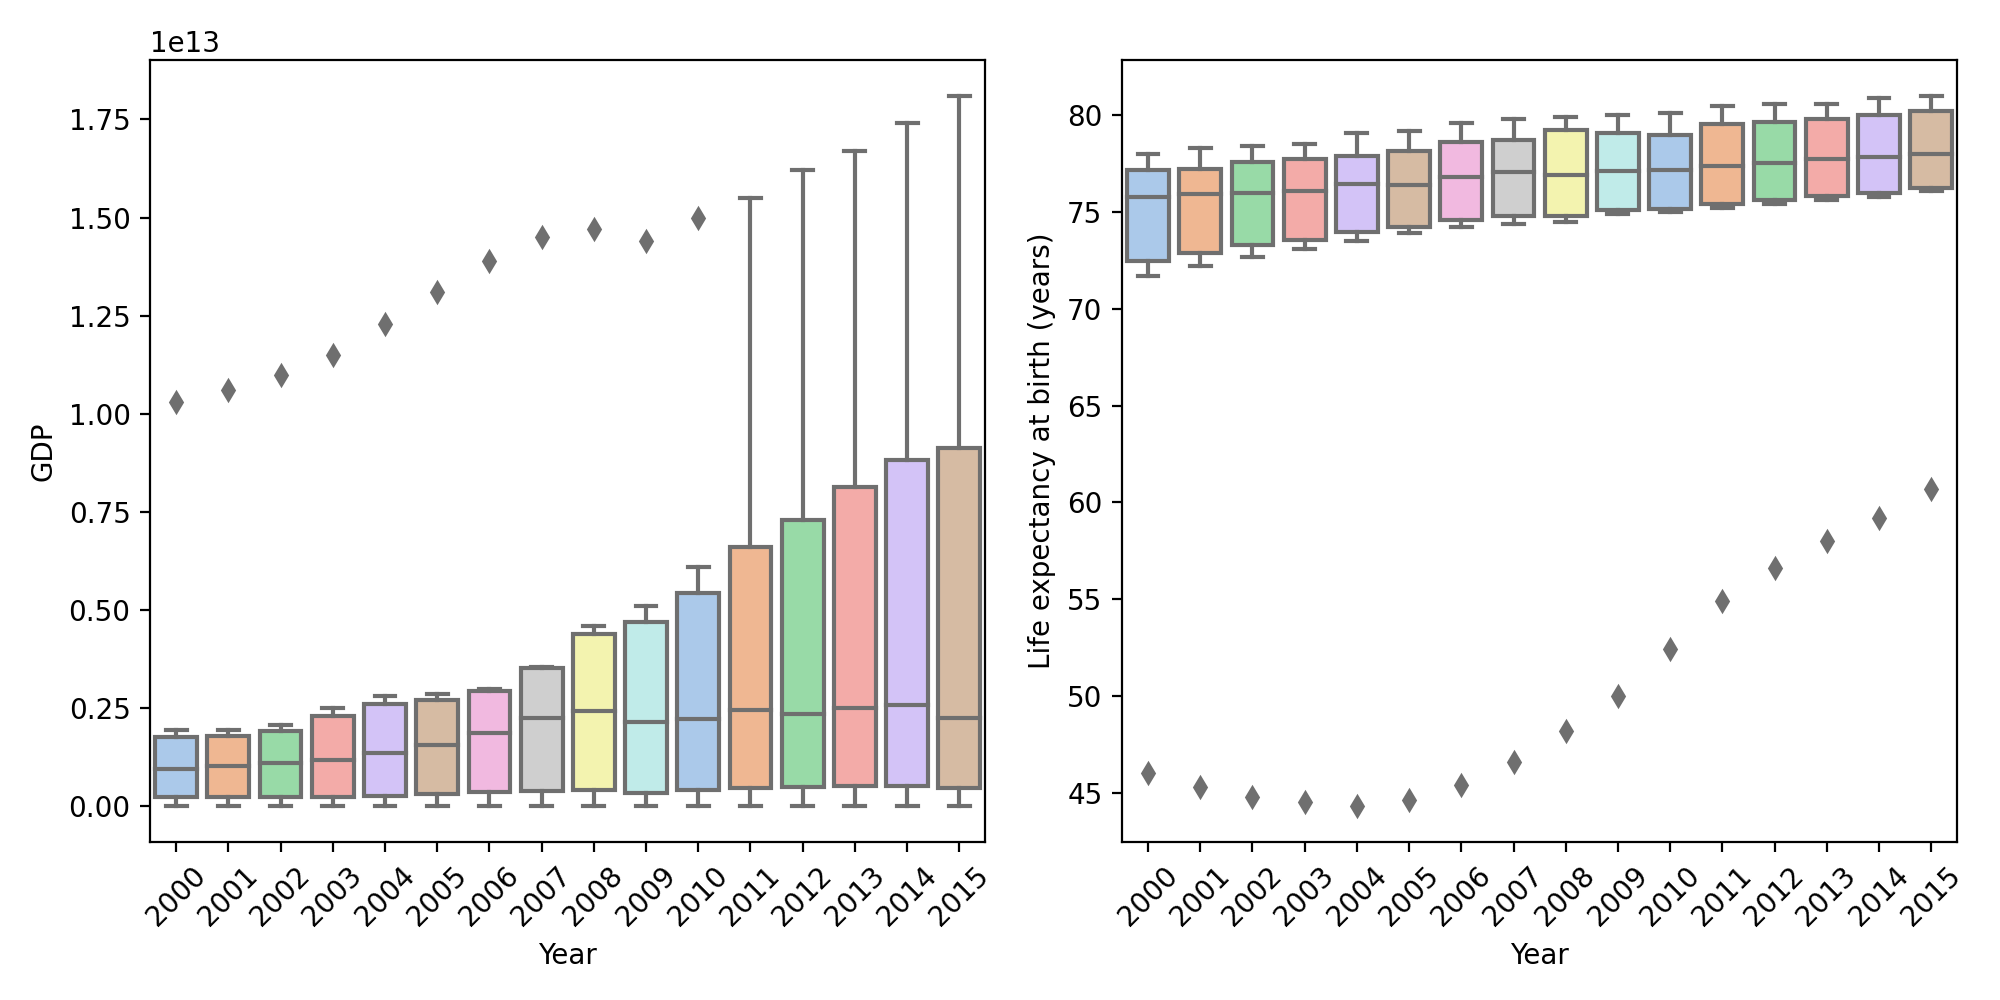

In [14]:
double_variable_vis('Year')

### Double Variable Findings



## Triple Variable Visualisation

In [15]:
def triple_variable_vis(x='GDP', y='Life expectancy at birth (years)'):
    plt.figure()
    sns.scatterplot(data=df, x=x, y=y, hue='Country', palette='colorblind')
    plt.show()

<IPython.core.display.Javascript object>


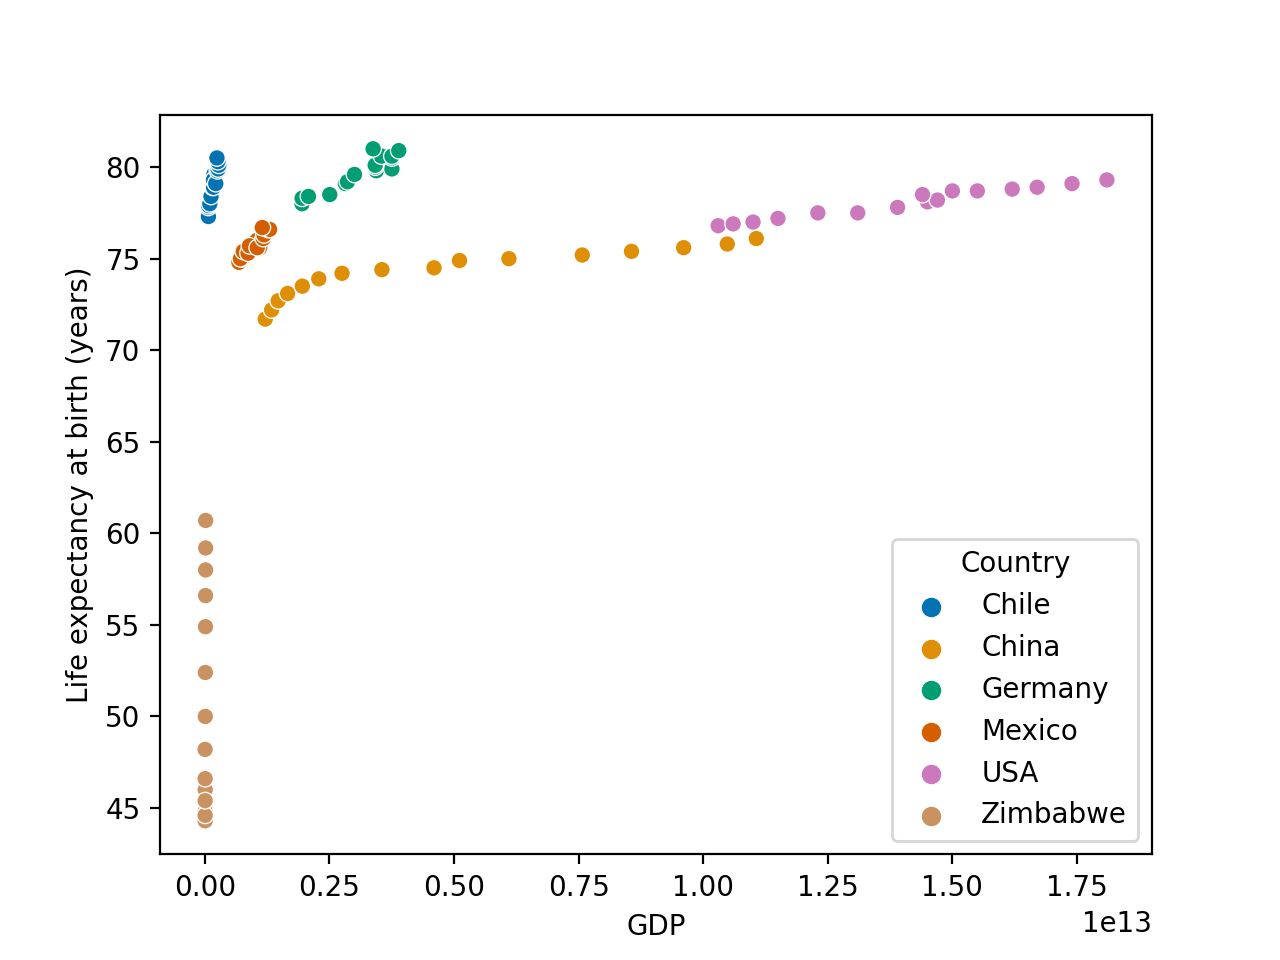

In [16]:
triple_variable_vis()

In [17]:
# Create col with ratio of GDP to Life Expectancy
df['GDP_LE_Ratio'] = df.GDP / df['Life expectancy at birth (years)']

In [18]:
def timed_triple_variable_vis(x, y):
    plt.figure()
    sns.lineplot(data=df, x=x, y=y, hue='Country', palette='colorblind')
    plt.show()

<IPython.core.display.Javascript object>


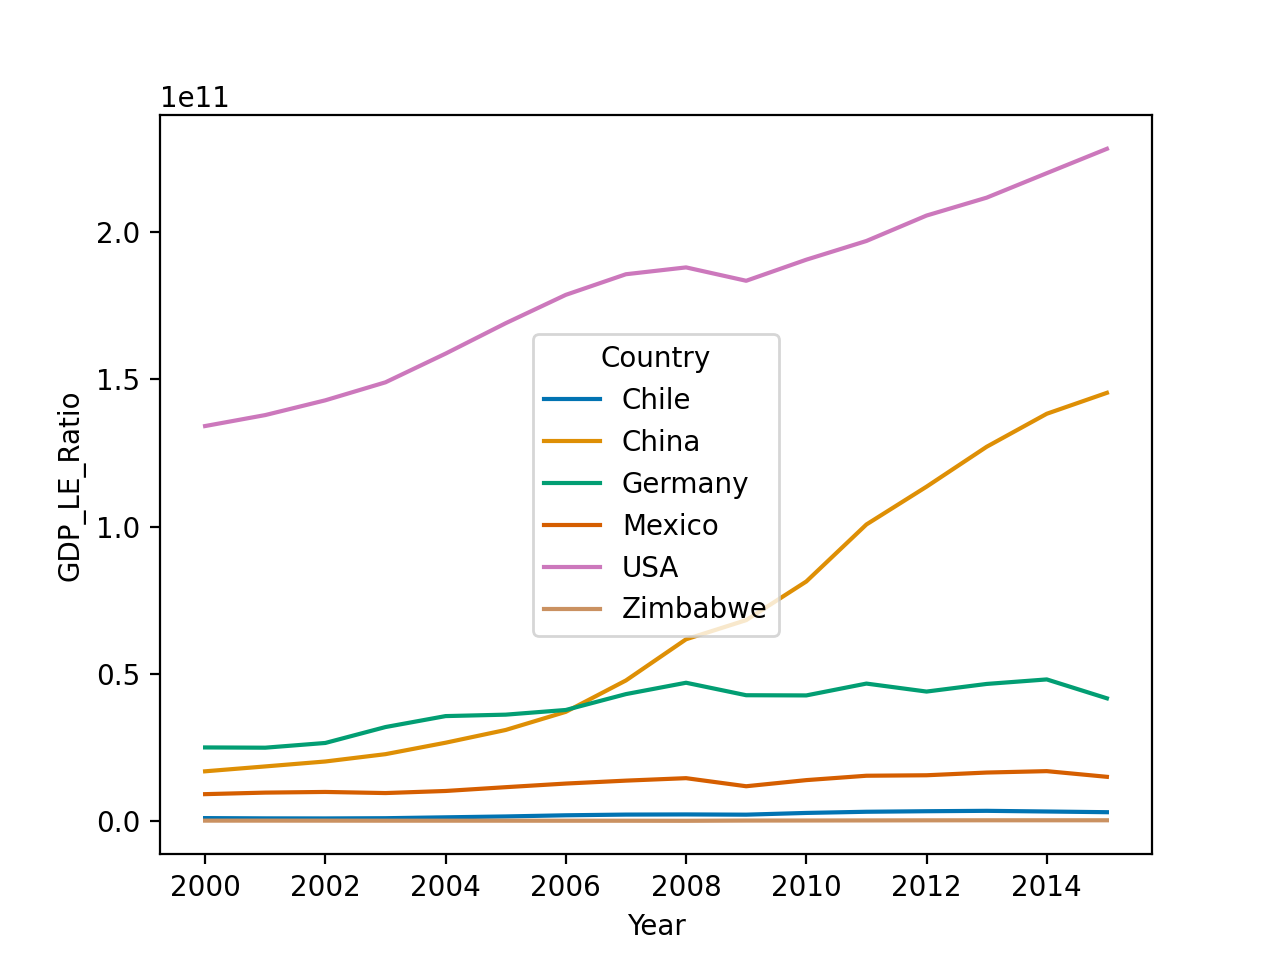

In [19]:
timed_triple_variable_vis(x='Year', y='GDP_LE_Ratio')

### Triple Variable Findings

# Conclusions